# Numerical Simulation Laboratory
## Exercise sheet 04

### Exercise 4.1
We improve the MD code by adding the ability to restart, reading from a file the configuration in the last and the second-last step, allowing the Verlet algorythm to resume.

We also add a function that rescales the second-last step positions found in the restart file, in order to try to match a specific temperature.

As expected, this velocity rescalation technique is rather rough, and the obtained temperature is usually different than the desired one. This is because the energy distribution of the particles, and thus the temperature, depends heavily on the positional initial configuration of the particles in addition to the velocity distribution. Moreover, using only the last-frame velocities to deduce the temperature leads to great statistical uncertainty.

### Exercise 4.2
We add block averaging: the $N$ steps of the simulation are divided in $M$ blocks, allowing to calculate average values for the physical quantities of interest with an estimation of the uncertainty.

### Exercise 04.3
We include the calculation of the pressure P using the virial theorem.

### Exercise 04.4
We use the code to calculate our physical quantities at different values of density and temperature, resulting in different phases.

To be able to obtain starting configurations that match the desired temperatures with accuracy, we tweak the rescaling algorithm so that it reads the final (block-averaged) value of the temperature in the previous simulation, rather than deduce it from the last-frame velocities. With this modification, the system converges to the desired temperature after just a handful of rescalings.

#### Solid Phase:
$ T = 0.8$

$ \rho = 1.1$

final estimation (in LJ units): kinetic energy = 1.15671 +- 0.0124356
final estimation (in LJ units): potential energy = 0.226245 +- 0.00510967
final estimation (in LJ units): energy = 1.38295 +- 0.0138305
final estimation (in LJ units): pressure = 0.899479 +- 0.00952396
final estimation (in LJ units): temperature = 0.771139 +- 0.00829039


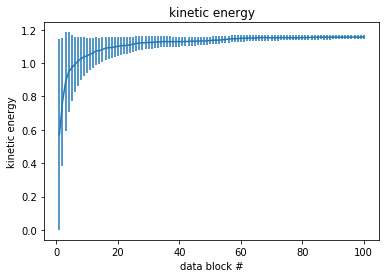

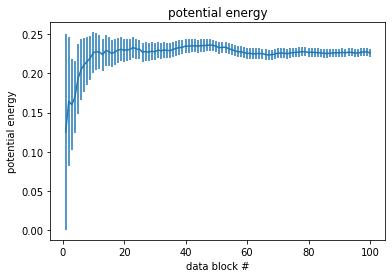

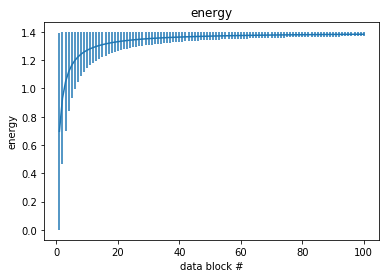

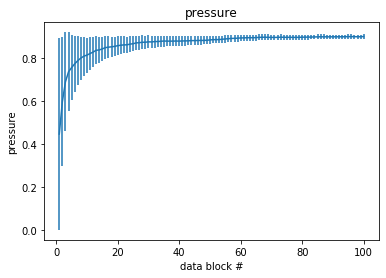

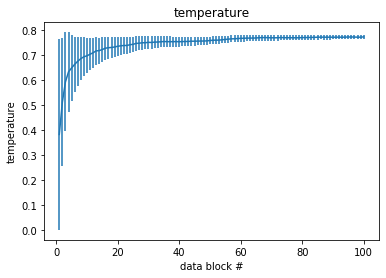

In [10]:
import numpy as np
import matplotlib.pyplot as plt
direc = "mol/config/t08/"
names = ["ekin", "epot", "etot", "pres", "temp"]
realnames = ['kinetic energy', 'potential energy', 'energy', 'pressure', 'temperature']
final_v_solid = np.zeros(len(names))
final_err_solid = np.zeros(len(names))
for k,name in enumerate(names):
    fig, ax = plt.subplots()
    y, err = np.loadtxt(direc+"ave_"+name+".dat", unpack=True)
    x = np.arange(1,len(y)+1)
    ax.errorbar(x,y, yerr=err)
    ax.set_xlabel('data block #')
    ax.set_ylabel(realnames[k])
    ax.set_title(realnames[k])
    print('final estimation (in LJ units): '+realnames[k]+' =',y[-1],'+-',err[-1])
    final_v_solid[k] = y[-1]; final_err_solid[k] = err[-1]
plt.show()

The peculiar shape of the error bars in the energy estimations could be a consequence of the functioning of the Verlet algorithm, which conserves the energy to great accuracy due to its time-reversal symmetry.

#### Liquid Phase:
$ T = 1.1$

$ \rho = 0.8$

final estimation (in LJ units): kinetic energy = 1.65186 +- 0.0173267
final estimation (in LJ units): potential energy = 0.0415682 +- 0.00523829
final estimation (in LJ units): energy = 1.69343 +- 0.0169354
final estimation (in LJ units): pressure = 0.902249 +- 0.00939093
final estimation (in LJ units): temperature = 1.10124 +- 0.0115511


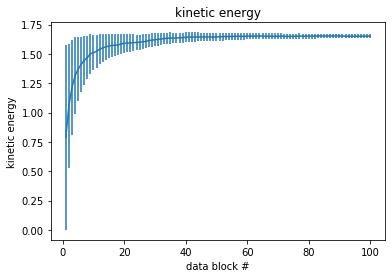

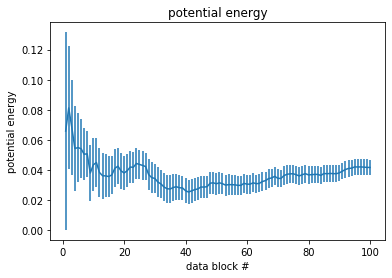

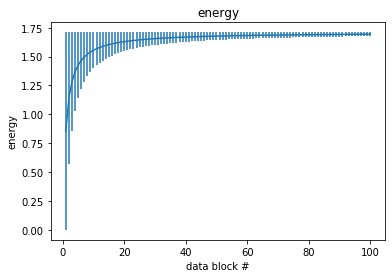

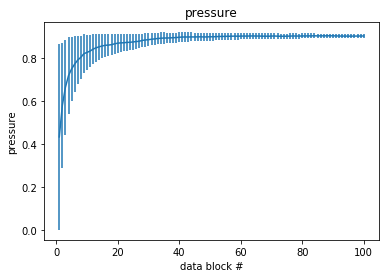

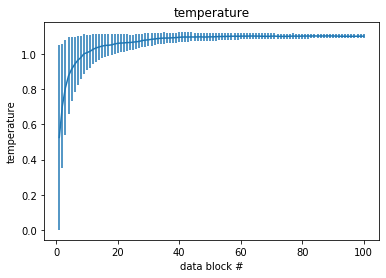

In [2]:
import numpy as np
import matplotlib.pyplot as plt
direc = "mol/config/t11/"
names = ["ekin", "epot", "etot", "pres", "temp"]
realnames = ['kinetic energy', 'potential energy', 'energy', 'pressure', 'temperature']
final_v_liquid = np.zeros(len(names))
final_err_liquid = np.zeros(len(names))
for k,name in enumerate(names):
    fig, ax = plt.subplots()
    y, err = np.loadtxt(direc+"ave_"+name+".dat", unpack=True)
    x = np.arange(1,len(y)+1)
    ax.errorbar(x,y, yerr=err)
    ax.set_xlabel('data block #')
    ax.set_ylabel(realnames[k])
    ax.set_title(realnames[k])
    print('final estimation (in LJ units): '+realnames[k]+' =',y[-1],'+-',err[-1])
    final_v_liquid[k] = y[-1]; final_err_liquid[k] = err[-1]
plt.show()

#### Gas Phase:
$ T = 1.2$

$ \rho = 0.05$

final estimation: (in LJ units)kinetic energy = 1.80683 +- 0.018102
final estimation: (in LJ units)potential energy = -0.0129099 +- 0.00111097
final estimation: (in LJ units)energy = 1.79392 +- 0.0179393
final estimation: (in LJ units)pressure = 0.0602604 +- 0.000603557
final estimation: (in LJ units)temperature = 1.20456 +- 0.012068


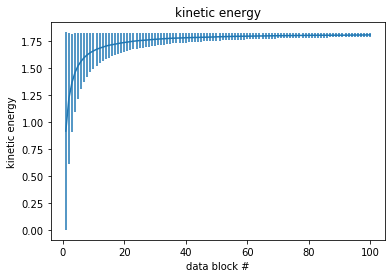

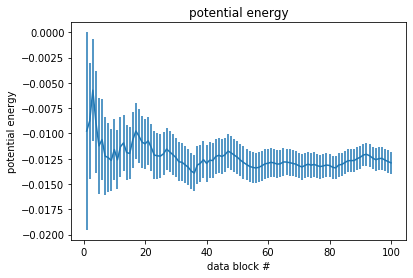

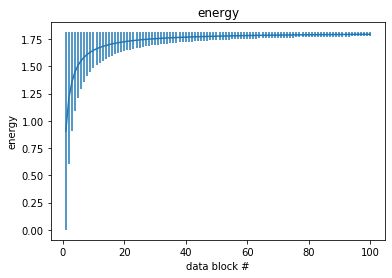

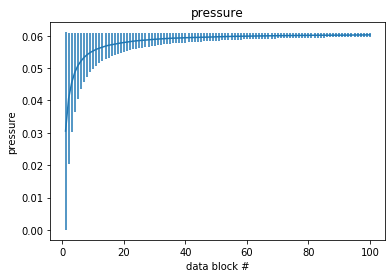

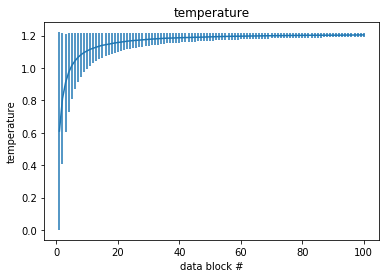

In [3]:
import numpy as np
import matplotlib.pyplot as plt
direc = "mol/config/t12/"
names = ["ekin", "epot", "etot", "pres", "temp"]
realnames = ['kinetic energy', 'potential energy', 'energy', 'pressure', 'temperature']
final_v_gas = np.zeros(len(names))
final_err_gas = np.zeros(len(names))
for k,name in enumerate(names):
    fig, ax = plt.subplots()
    y, err = np.loadtxt(direc+"ave_"+name+".dat", unpack=True)
    x = np.arange(1,len(y)+1)
    ax.errorbar(x,y, yerr=err)
    ax.set_xlabel('data block #')
    ax.set_ylabel(realnames[k])
    ax.set_title(realnames[k])
    print('final estimation: (in LJ units)'+realnames[k]+' =',y[-1],'+-',err[-1])
    final_v_gas[k] = y[-1]; final_err_gas[k] = err[-1]
plt.show()

So far, we performed all simulations in Lennard-Jones units. By rescaling the obtained quantities, these simulations can be seen to represent the physics of infinitely many Lennard-Jones gases, each with its own values of $m$, $\epsilon$ and $\sigma$, through which the same values of $\rho^\star$ and $T^\star$ correspond to different values of $\rho$ and $T$.

In terms of the corresponding reduced quantities, the "normal" quantities are expressed as:

$$
    E =  \epsilon V^\star \\
    P =  \frac{\epsilon}{\sigma^3} P^\star\\
    T =  \frac{\epsilon}{k_B} T^\star \\
$$

By substituting the SI values of the Lennard-Jones parameters and of the Boltzmann constant for Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu), we can obtain physical predictions for these gases in the three phases used:

#### Argon / solid:

In [4]:
kb = 1.3806 * 10**-23
eoverkb = 120
sigma = 0.34 * 10**-9
print('Kinetic Energy per particle: ', final_v_solid[0] * eoverkb * kb , '+-', final_err_solid[0] * eoverkb * kb, 'J')
print('Potential Energy per particle: ', final_v_solid[1] * eoverkb * kb , '+-', final_err_solid[1] * eoverkb * kb, 'J')
print('Total Energy per particle: ', final_v_solid[2] * eoverkb * kb , '+-', final_err_solid[2] * eoverkb * kb, 'J')
print('Pressure: ', final_v_solid[3] * eoverkb * kb/sigma**3 , '+-', final_err_solid[3] * eoverkb * kb/sigma**3, 'Pa')
print('Temperature: ', final_v_solid[4]* eoverkb, '+-', final_err_solid[4] * eoverkb, 'K')

Kinetic Energy per particle:  1.9163445911999997e-21 +- 2.0602307232e-23 J
Potential Energy per particle:  3.7482461639999997e-22 +- 8.4652924824e-24 J
Total Energy per particle:  2.2911609239999997e-21 +- 2.291326596e-23 J
Pressure:  37914330.57398736 +- 401448.5805821288 Pa
Temperature:  92.53668 +- 0.9948468 K


#### Argon / liquid:

In [5]:
kb = 1.3806 * 10**-23
eoverkb = 120
sigma = 0.34 * 10**-9
print('Kinetic Energy per particle: ', final_v_liquid[0] * eoverkb * kb , '+-', final_err_liquid[0] * eoverkb * kb, 'J')
print('Potential Energy per particle: ', final_v_liquid[1] * eoverkb * kb , '+-', final_err_liquid[1] * eoverkb * kb, 'J')
print('Total Energy per particle: ', final_v_liquid[2] * eoverkb * kb , '+-', final_err_liquid[2] * eoverkb * kb, 'J')
print('Pressure: ', final_v_liquid[3] * eoverkb * kb/sigma**3 , '+-', final_err_liquid[3] * eoverkb * kb/sigma**3, 'Pa')
print('Temperature: ', final_v_liquid[4]* eoverkb, '+-', final_err_liquid[4] * eoverkb, 'K')

Kinetic Energy per particle:  2.7366694992e-21 +- 2.8705490423999996e-23 J
Potential Energy per particle:  6.8866868304e-23 +- 8.678379808799997e-24 J
Total Energy per particle:  2.8055393495999997e-21 +- 2.8057215888e-23 J
Pressure:  38031090.04884996 +- 395841.17518827575 Pa
Temperature:  132.1488 +- 1.386132 K


#### Argon / gas:

In [6]:
kb = 1.3806 * 10**-23
eoverkb = 120
sigma = 0.34 * 10**-9
print('Kinetic Energy per particle: ', final_v_gas[0] * eoverkb * kb , '+-', final_err_gas[0] * eoverkb * kb, 'J')
print('Potential Energy per particle: ', final_v_gas[1] * eoverkb * kb , '+-', final_err_gas[1] * eoverkb * kb, 'J')
print('Total Energy per particle: ', final_v_gas[2] * eoverkb * kb , '+-', final_err_gas[2] * eoverkb * kb, 'J')
print('Pressure: ', final_v_gas[3] * eoverkb * kb/sigma**3 , '+-', final_err_gas[3] * eoverkb * kb/sigma**3, 'Pa')
print('Temperature: ', final_v_gas[4]* eoverkb, '+-', final_err_gas[4] * eoverkb, 'K')

Kinetic Energy per particle:  2.9934113975999993e-21 +- 2.9989945439999996e-23 J
Potential Energy per particle:  -2.1388089527999998e-23 +- 1.8405662183999998e-24 J
Total Energy per particle:  2.9720231423999995e-21 +- 2.9720397095999994e-23 J
Pressure:  2540062.3317728457 +- 25440.793635253394 Pa
Temperature:  144.5472 +- 1.4481600000000001 K


#### Krypton / solid:

In [7]:
kb = 1.3806 * 10**-23
eoverkb = 164
sigma = 0.364 * 10**-9
print('Kinetic Energy per particle: ', final_v_solid[0] * eoverkb * kb , '+-', final_err_solid[0] * eoverkb * kb, 'J')
print('Potential Energy per particle: ', final_v_solid[1] * eoverkb * kb , '+-', final_err_solid[1] * eoverkb * kb, 'J')
print('Total Energy per particle: ', final_v_solid[2] * eoverkb * kb , '+-', final_err_solid[2] * eoverkb * kb, 'J')
print('Pressure: ', final_v_solid[3] * eoverkb * kb/sigma**3 , '+-', final_err_solid[3] * eoverkb * kb/sigma**3, 'Pa')
print('Temperature: ', final_v_solid[4]* eoverkb, '+-', final_err_solid[4] * eoverkb, 'K')

Kinetic Energy per particle:  2.6190042746399996e-21 +- 2.8156486550399995e-23 J
Potential Energy per particle:  5.1226030907999995e-22 +- 1.156923305928e-23 J
Total Energy per particle:  3.1312532627999996e-21 +- 3.1314796812e-23 J
Pressure:  42227813.473614275 +- 447121.0627598459 Pa
Temperature:  126.466796 +- 1.35962396 K


#### Krypton / liquid:

In [8]:
kb = 1.3806 * 10**-23
eoverkb = 164
sigma = 0.364 * 10**-9
print('Kinetic Energy per particle: ', final_v_liquid[0] * eoverkb * kb , '+-', final_err_liquid[0] * eoverkb * kb, 'J')
print('Potential Energy per particle: ', final_v_liquid[1] * eoverkb * kb , '+-', final_err_liquid[1] * eoverkb * kb, 'J')
print('Total Energy per particle: ', final_v_liquid[2] * eoverkb * kb , '+-', final_err_liquid[2] * eoverkb * kb, 'J')
print('Pressure: ', final_v_liquid[3] * eoverkb * kb/sigma**3 , '+-', final_err_liquid[3] * eoverkb * kb/sigma**3, 'Pa')
print('Temperature: ', final_v_liquid[4]* eoverkb, '+-', final_err_liquid[4] * eoverkb, 'K')

Kinetic Energy per particle:  3.7401149822400004e-21 +- 3.92308369128e-23 J
Potential Energy per particle:  9.411805334879999e-23 +- 1.1860452405359998e-23 J
Total Energy per particle:  3.834237111119999e-21 +- 3.834486171359999e-23 J
Pressure:  42357856.58003689 +- 440875.70736367226 Pa
Temperature:  180.60336 +- 1.8943804 K


#### Krypton / gas:

In [9]:
kb = 1.3806 * 10**-23
eoverkb = 164
sigma = 0.364 * 10**-9
print('Kinetic Energy per particle: ', final_v_gas[0] * eoverkb * kb , '+-', final_err_gas[0] * eoverkb * kb, 'J')
print('Potential Energy per particle: ', final_v_gas[1] * eoverkb * kb , '+-', final_err_gas[1] * eoverkb * kb, 'J')
print('Total Energy per particle: ', final_v_gas[2] * eoverkb * kb , '+-', final_err_gas[2] * eoverkb * kb, 'J')
print('Pressure: ', final_v_gas[3] * eoverkb * kb/sigma**3 , '+-', final_err_gas[3] * eoverkb * kb/sigma**3, 'Pa')
print('Temperature: ', final_v_gas[4]* eoverkb, '+-', final_err_gas[4] * eoverkb, 'K')

Kinetic Energy per particle:  4.0909955767199995e-21 +- 4.0986258767999996e-23 J
Potential Energy per particle:  -2.92303890216e-23 +- 2.5154404984799997e-24 J
Total Energy per particle:  4.0617649612799994e-21 +- 4.0617876031199994e-23 J
Pressure:  2829043.1806027554 +- 28335.172268273313 Pa
Temperature:  197.54784 +- 1.979152 K
